In [97]:
import pandas as pd
import numpy as np
import seaborn as sns

In [98]:
df = pd.read_csv('Social_Network_Ads.csv')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [100]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [101]:
#df['Gender'] = np.where(df['Gender']=='Male', '0', '1')

In [102]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [103]:
## 0-> male 1->female

In [104]:
df=pd.get_dummies(df, columns=['Gender'], drop_first= True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
 4   Gender_Male      400 non-null    bool 
dtypes: bool(1), int64(4)
memory usage: 13.0 KB


In [106]:
x=df.iloc[:,[1,2,4]]

In [107]:
y=df['Purchased']

In [108]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [112]:
y_train.shape

(360,)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
Lr= LogisticRegression(max_iter=200)

In [115]:
Lr.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [116]:
y_pred=Lr.predict(x_test)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(y_pred, y_test)

0.825

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [120]:
cm=confusion_matrix(y_pred, y_test)

In [121]:
cm

array([[20,  4],
       [ 3, 13]], dtype=int64)

In [122]:
TN, FP, FN, TP = cm.ravel()

In [123]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

# Print
print("Confusion Matrix:")
print(cm)
print(f"\nTrue Positives: {TP}")
print(f"False Positives: {FP}")
print(f"True Negatives: {TN}")
print(f"False Negatives: {FN}")
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
[[20  4]
 [ 3 13]]

True Positives: 13
False Positives: 4
True Negatives: 20
False Negatives: 3

Accuracy: 0.82
Error Rate: 0.18
Precision: 0.76
Recall: 0.81


<Axes: >

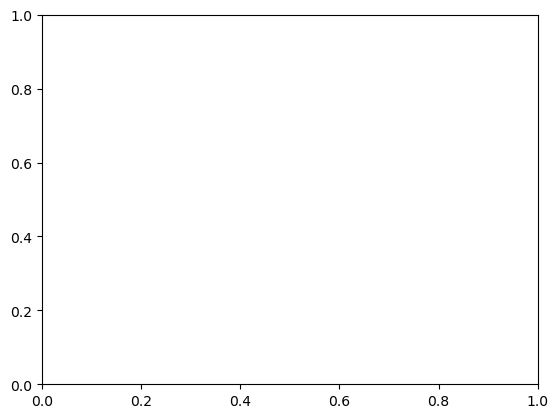

In [124]:
sns.scatterplot()